In [3]:
# import...
import numpy as np
import xarray as xr
import os
import matplotlib.pyplot as plt
import warnings
import pandas as pd

os.chdir("/Users/etmu9498/research/code/scripts")
import make_plots
import make_plots_new_heights
import tc_metadata
import helper_fns


In [5]:
# loading original 2021 flight level data
# results: liquid water content [LWC.1] isn't present :(
# also no water vapor

# other options:
# EEref -> vapor pressure, EW -> saturated vapor pressure X
# HUM_REL -> relative humidity Yes!!
# Lichum_abs -> licor absolute humidity X 
# MR -> mixing ratio  Yes!!!


old_fl_path = "/Users/etmu9498/research/data/in-situ"
new_fl_path = '/Users/etmu9498/research/data/in-situ-new'

# os.chdir( old_fl_path)
# fl_data_old = pd.read_csv( "20210927H1_iwg1.txt", header=None, on_bad_lines='skip')
# fl_data_old

os.chdir( new_fl_path)
fl_data_new = xr.open_dataset("in-situ-sam-09-27-eye-2.nc")
# fl_data_new


# final test: checking out data 
path = '/Users/etmu9498/research/data/in-situ-nc'
os.chdir( new_fl_path)
data = xr.open_dataset("in-situ-sam-09-27-eye-2.nc")
data


<xarray.Dataset>
Dimensions:            (index: 32852, time: 32852)
Coordinates:
  * index              (index) int64 0 1 2 3 4 ... 32847 32848 32849 32850 32851
  * time               (time) float64 18.17 18.17 18.17 ... 27.53 27.53 27.53
Data variables: (12/137)
    IWG1_NAMES         (index) object ...
    TIME               (index) object ...
    LATref             (index) object ...
    LONref             (index) object ...
    ALTref             (index) object ...
    GPS_GeoidHt.3      (index) float64 ...
    ...                 ...
    dt                 (index) datetime64[ns] ...
    float_time         (index) float64 ...
    str_time           (index) object ...
    rollval            (index) float64 ...
    pitchval           (index) float64 ...
    distance           (time) float64 ...

In [32]:
# load crl data for plotting comparisons

crl_path = '/Users/etmu9498/research/data/CRL_data/2021' # '/Users/etmu9498/research/data/crl-new-matrices'
os.chdir(crl_path)
name =  'P3_20210927H1_213003-253558.cdf' # "crl-sam-09-27-eye-2.nc"
crl_data = xr.open_dataset( name)

In [51]:
# looking at the 2022 data! 
# results: it takes so long to load :(
# no water vapor [WV.1], but there are a bunch of LWC.1 variables!

# fl_path_2022 = '/Users/etmu9498/research/data/in-situ/2022'
# os.chdir(fl_path_2022)
# fl_data_2022AC = xr.open_dataset("20220920H1_AC.nc", decode_times=False)
# fl_data_2022AC

fl_path_big = '/Users/etmu9498/research/data/in-situ/2022'
os.chdir(fl_path_big)
fl_data_big = xr.open_dataset("20210927H1_AC.nc", decode_times=False)
fl_data_big

<xarray.Dataset>
Dimensions:              (Time: 33766)
Coordinates:
  * Time                 (Time) int32 0 1 2 3 4 ... 33762 33763 33764 33765
Data variables: (12/574)
    YawRateI.2           (Time) float32 ...
    YawRateI.1           (Time) float32 ...
    YawRateI-GPS.2       (Time) float32 ...
    YawRateI-GPS.1       (Time) float32 ...
    VerrGPS.2            (Time) float32 ...
    VerrGPS.1            (Time) float32 ...
    ...                   ...
    ALTPAft.d            (Time) float32 ...
    AltRa1.c             (Time) float32 ...
    AltRa2.c             (Time) float32 ...
    UDIRX.d              (Time) float32 ...
    UDIRY.d              (Time) float32 ...
    UDIRZ.d              (Time) float32 ...
Attributes:
    StartTime:     1632766124
    FlightDate:    2021-09-27
    TimeInterval:  18:08:44-03:31:30

In [5]:
# helper function used to turn string w values into floats
def in_situ_to_float( return_var):
    return_var_temp = np.zeros( len( return_var))
    for line_ind in range( len( return_var)):
        if return_var[ line_ind] == '':
            return_var_temp[line_ind] = np.nan
        else:
            return_var_temp[ line_ind] = float( return_var[ line_ind])
    return return_var_temp

In [47]:
# get data into usable format
wvmr = in_situ_to_float( fl_data_new['MR.d'] ) # probably in g/kg ?
rh = in_situ_to_float( fl_data_new['HUM_REL.d'] )
spd = in_situ_to_float( fl_data_new['WS.d'] )

# lwc = in_situ_to_float( fl_data_new['LWC.1'] )
# lwc2 = in_situ_to_float( fl_data_new['LWC.2'] )
lwc = fl_data_big['LWC.1']
lwc2 = fl_data_big['LWC.2'] 
spd_test = fl_data_big['WS.d']

# trads -> side radiometer ( in celsius)
# tradd -> downward pointing radiometer (C)
rs = in_situ_to_float( fl_data_new[ 'TRadS.1'])
rd = in_situ_to_float( fl_data_new[ 'TRadD.1'])

totaltemp1 = in_situ_to_float( fl_data_new[ 'TTM.1'])
T = in_situ_to_float( fl_data_new[ 'TA.d'])

In [16]:
print( np.nanmax( lwc))
print( np.nanmax( lwc2))

nan
nan


C:\Users\etmu9498\AppData\Local\Temp\ipykernel_19372\1060366421.py:1: RuntimeWarning: All-NaN axis encountered
  print( np.nanmax( lwc))
C:\Users\etmu9498\AppData\Local\Temp\ipykernel_19372\1060366421.py:2: RuntimeWarning: All-NaN axis encountered
  print( np.nanmax( lwc2))


'\nplt.subplot(514)\nplt.plot( fl_data_big.Time, spd_test, c=\'k\', linewidth=3)\n# plt.ylabel( "Total Wind Speed, New Dataset (m/s)")\n# plt.xlim( [21, 26])\n\nplt.subplot(515)\nplt.plot( fl_data_big.Time, lwc, c=\'y\', linewidth=1.5, label="LWC #1")\nplt.plot( fl_data_big.Time, lwc2, c=\'r\', linewidth=1.5, label="LWC #2")\n# plt.ylabel( "LWC, New Dataset ()")\nplt.legend()\n'

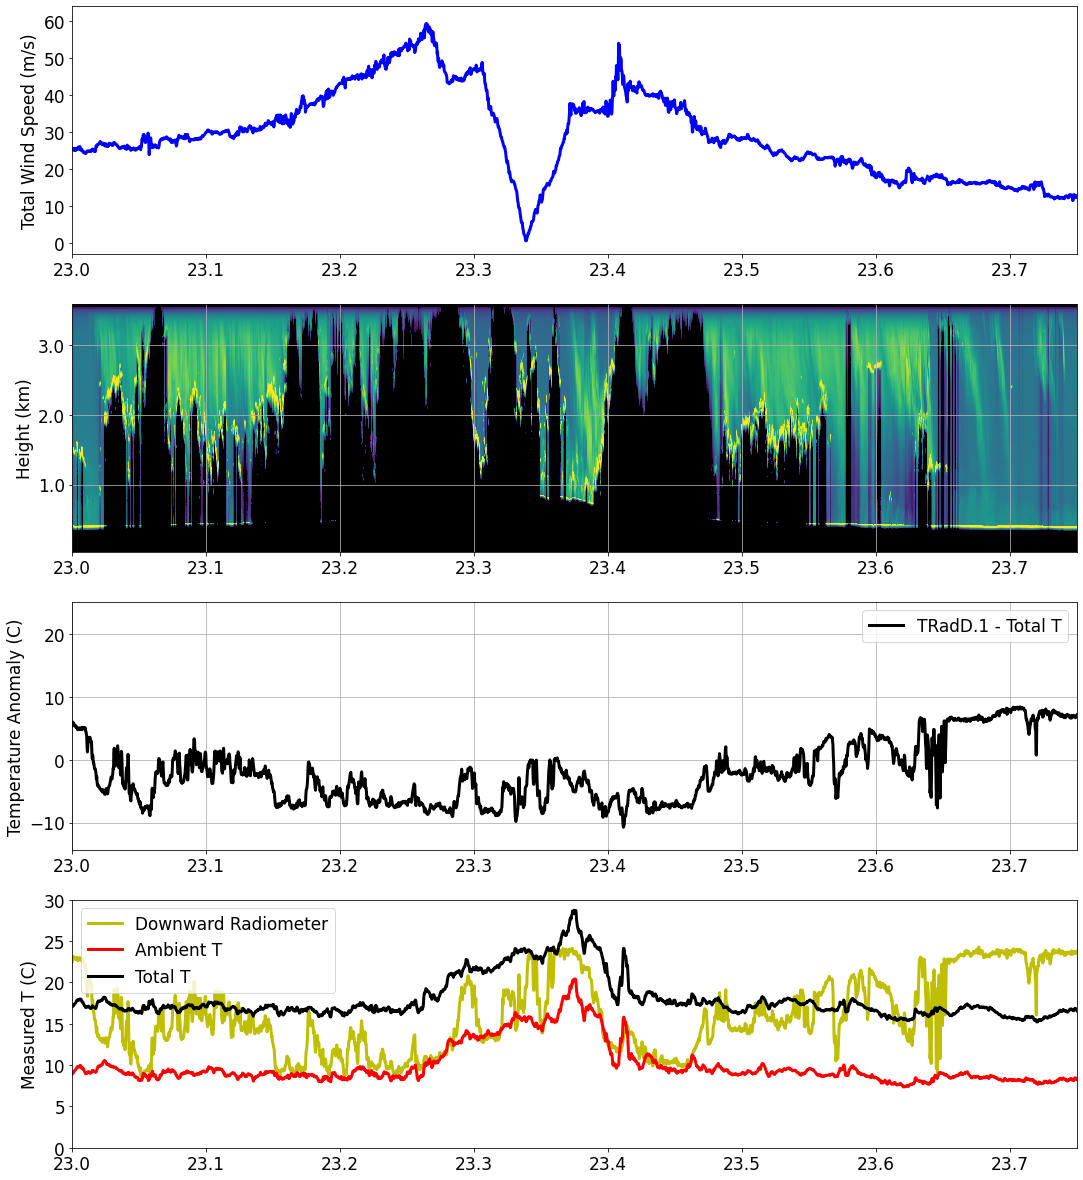

In [55]:
# plot some of the variables from the 2021 dataset to see if they'd be useful in determining TC eyewalls!

plt.figure( figsize=( 18, 21))
helper_fns.change_font_sizes(17, 17)

'''
plt.subplot(411)
plt.title("Some Possible Flight Level Eyewall Finders for TC Sam, 9/27/21")
plt.plot( fl_data_new.time, wvmr, c='y', linewidth=3)
plt.ylabel( "WVMR (g/kg)")
plt.xlim( [21, 26])
plt.ylim( [0, 25])

plt.subplot(412)
plt.plot( fl_data_new.time, rh, c='g', linewidth=3)
plt.ylabel( "Relative Humidity (%)")
plt.xlim( [21, 26])
plt.ylim( [0, 100])
'''
lims =[23, 23.75] # [21, 26]

plt.subplot(411)
plt.plot( fl_data_new.time, spd, c='b', linewidth=3)
plt.ylabel( "Total Wind Speed (m/s)")
plt.xlim( lims)


plt.subplot(412)
make_plots.plot_power_ch1( crl_path, name, 0, len( crl_data.time)-1, 'time', show_colorbar=False)
plt.xlim( lims)


plt.subplot(414)
plt.plot( fl_data_new.time, rd, c='y', linewidth=3, label='Downward Radiometer')
plt.plot( fl_data_new.time, T, c='r', linewidth=3, label='Ambient T')
plt.plot( fl_data_new.time, totaltemp1, c='k', linewidth=3, label='Total T')
plt.ylabel( "Measured T (C)")
plt.xlim( lims)
plt.legend()
plt.ylim([ 0, 30])

plt.subplot(413)
plt.plot( fl_data_new.time, rd - totaltemp1, c='k', linewidth=3, label='TRadD.1 - Total T')
plt.ylabel( "Temperature Anomaly (C)")
plt.xlim( lims)
plt.legend()
plt.grid()


'''
plt.subplot(514)
plt.plot( fl_data_big.Time, spd_test, c='k', linewidth=3)
# plt.ylabel( "Total Wind Speed, New Dataset (m/s)")
# plt.xlim( [21, 26])

plt.subplot(515)
plt.plot( fl_data_big.Time, lwc, c='y', linewidth=1.5, label="LWC #1")
plt.plot( fl_data_big.Time, lwc2, c='r', linewidth=1.5, label="LWC #2")
# plt.ylabel( "LWC, New Dataset ()")
plt.legend()
'''